In [9]:
from PIL import Image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import visualpriors
import subprocess

In [8]:
image = Image.open('/Users/kelchtermans/Downloads/test.png')
o_t = TF.to_tensor(TF.resize(image, 256)) * 2 - 1
o_t = o_t[:3, :, :]
o_t = o_t.unsqueeze_(0)

In [27]:
o_t.shape

torch.Size([1, 3, 256, 256])

In [21]:
import h5py
import os
from src.core.data_types import Dataset
#filename = os.path.join(os.environ['DATADIR'], 'line_world_data', 'real', 'validation.hdf5')
#h5py_file = h5py.File(filename, 'r')
#dataset = Dataset()
#dataset.extend(h5py_file['dataset'])
#image = dataset.observations[0]
image = Image.open('/Users/kelchtermans/mount/ubuntu/home/klaas/code/imitation-learning-codebase/experimental_data/line_world_real2/concrete_bluecable/raw_data/20-07-24_11-22-29_joystick/observation/001595582561766.jpg')
o_t = TF.to_tensor(TF.resize(image, 256)) * 2 - 1
o_t = o_t[:3, :, :]
o_t = o_t.unsqueeze_(0)

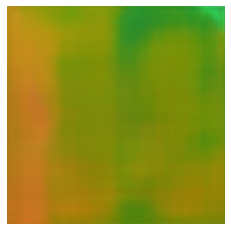

In [22]:
# predict normals
feature_type = 'normal'
# Transform to normals feature
representation = visualpriors.representation_transform(o_t, feature_type, device='cpu') # phi(o_t) in the diagram below

# Transform to normals feature and then visualize the readout
pred = visualpriors.feature_readout(o_t, feature_type, device='cpu')

# Save it
#TF.to_pil_image(pred[0] / 2. + 0.5).save('test_{}_readout.png'.format(feature_type))
plt.imshow((pred[0] / 2. + 0.5).detach().numpy().swapaxes(0,1).swapaxes(1,2))
plt.axis('off')
plt.show()

In [26]:
tasks = ['autoencoding', 'depth_euclidean', 'jigsaw', 'reshading', 'colorization', 'edge_occlusion', 'keypoints2d', 'room_layout', 'curvature', 'edge_texture', 'keypoints3d', 'segment_unsup2d', 
'class_object',  'egomotion', 'nonfixated_pose', 'segment_unsup25d',  'class_scene', 'fixated_pose', 'normal', 'segment_semantic', 'denoising', 'inpainting', 'point_matching', 'vanishing_point']

not_working_models = ['colorization', 'reshading']
for feature_type in tasks:
    if feature_type in not_working_models:
        continue
    image = Image.open('/Users/kelchtermans/mount/ubuntu/home/klaas/code/imitation-learning-codebase/experimental_data/line_world_real2/concrete_bluecable/raw_data/20-07-24_11-22-29_joystick/observation/001595582561766.jpg')
    o_t = TF.to_tensor(TF.resize(image, 256)) * 2 - 1
    o_t = o_t[:3, :, :]
    o_t = o_t.unsqueeze_(0)

    representation = visualpriors.representation_transform(o_t, feature_type, device='cpu') # phi(o_t) in the diagram below
    print(f'{feature_type}: {representation.shape}')

    # Transform to normals feature and then visualize the readout
#        pred = visualpriors.feature_readout(o_t, feature_type, device='cpu')

    # Save it
#        plt.imshow((pred[0] / 2. + 0.5).detach().numpy().swapaxes(0,1).swapaxes(1,2))
#        plt.axis('off')
#        plt.show()

autoencoding: torch.Size([1, 8, 16, 16])
depth_euclidean: torch.Size([1, 8, 16, 16])
jigsaw: torch.Size([1, 8, 16, 16])
edge_occlusion: torch.Size([1, 8, 16, 16])
keypoints2d: torch.Size([1, 8, 16, 16])
room_layout: torch.Size([1, 8, 16, 16])
curvature: torch.Size([1, 8, 16, 16])
edge_texture: torch.Size([1, 8, 16, 16])
keypoints3d: torch.Size([1, 8, 16, 16])
segment_unsup2d: torch.Size([1, 8, 16, 16])
class_object: torch.Size([1, 8, 16, 16])
egomotion: torch.Size([1, 8, 16, 16])
nonfixated_pose: torch.Size([1, 8, 16, 16])
segment_unsup25d: torch.Size([1, 8, 16, 16])
class_scene: torch.Size([1, 8, 16, 16])
fixated_pose: torch.Size([1, 8, 16, 16])
normal: torch.Size([1, 8, 16, 16])
segment_semantic: torch.Size([1, 8, 16, 16])
denoising: torch.Size([1, 8, 16, 16])
inpainting: torch.Size([1, 8, 16, 16])
point_matching: torch.Size([1, 8, 16, 16])
vanishing_point: torch.Size([1, 8, 16, 16])
